# **Table of Contents**
* [Add Squared Features](#section_a)
  <br><br>
* [Feature Selection](#section_b)
    * [RFE](#section_3)
    * [SFS](#section_2)

In [1]:
import  numpy             as np
import  pandas            as pd
import  matplotlib.pyplot as plt
import  seaborn           as sns

from   sklearn.linear_model   import  LinearRegression

import warnings
warnings.simplefilter ('ignore')

In [2]:
from  sklearn.datasets  import  load_boston

bos  =  load_boston()

df   =  pd.DataFrame ( bos.data , columns = bos.feature_names )

df ['Price'] = bos.target

df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
360,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,25.0
485,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01,21.8
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65,24.3
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0


In [3]:
x  =  df.drop('Price', axis=1)
y  =  df['Price']

In [4]:
x.shape

(506, 13)

<a id='section_a'></a>
# Part 1 - **Add squared features**

In [5]:
cols  =  list(x.columns)

cols.remove('CHAS')

for i in cols:
    x [i + " 2"]  =  x[i]**2
    
cols = list(x.columns)

cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CRIM 2',
 'ZN 2',
 'INDUS 2',
 'NOX 2',
 'RM 2',
 'AGE 2',
 'DIS 2',
 'RAD 2',
 'TAX 2',
 'PTRATIO 2',
 'B 2',
 'LSTAT 2']

In [6]:
x.shape

(506, 25)

<a id='section_b'></a>
# Part 2 - **Feature Selection**

<a id='section_3'></a>
# **1. RFE**

In [7]:
from   sklearn.feature_selection  import  RFE
from   sklearn.model_selection    import  train_test_split

x_train, x_test, y_train, y_test    =     train_test_split ( x, y,   test_size =0.3,    random_state =42 )

### **i. Finding best n_features**

In [8]:
scores = []

for n in range(1,26):
    
    lr   =  LinearRegression()
    rfe  =  RFE (lr,  n_features_to_select =n)
    
    rfe.fit (x_train , y_train)
    
    scores.append (  rfe.score(x_test, y_test)  )

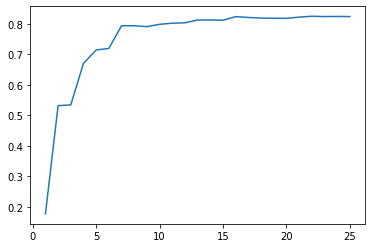

In [9]:
plt.plot ( np.arange(1,26)  ,   scores ) 

plt.show()

In [10]:
pd.DataFrame (scores)

,0
0,0.177502
1,0.531724
2,0.534339
3,0.670285
4,0.713964
5,0.719010
6,0.793278
7,0.793262
8,0.790404
9,0.798004


In [11]:
max(scores)

0.8244438513638466

> Comments
    
        * We have to chose n_features which is 
            - as low as possible
            - having score close to max score
            
        * From the above table ,
            - best n_features = 16

### **ii. Using best n_features**

In [12]:
lr  =  LinearRegression()

rfe =  RFE (  lr ,  n_features_to_select =13 )                        #  mathematically chosen n_features 

rfe.fit (x,y)

pd.DataFrame (rfe.ranking_ ,  index =x.columns)

,0
CRIM,1
ZN,9
INDUS,1
CHAS,1
NOX,1
RM,1
AGE,8
DIS,1
RAD,1
TAX,3


> Comments
        
        * These are the best 13 features
        * We ELIMINATED 12 features, without much effect on performance

<a id='section_2'></a>
# **2. SFS**

In [13]:
from   mlxtend.feature_selection    import   SequentialFeatureSelector  as  SFS

from   sklearn.model_selection      import   KFold

In [14]:
lr  =  LinearRegression()                                                            
 
kf  =  KFold ( n_splits =5  ,  shuffle =True  ,  random_state =42 )

### **i. Finding best k_features**

In [15]:
sfs =  SFS ( lr,  k_features =25,   scoring ='r2',    cv =kf )                      # 25 num of cols

sfs.fit (x,y)                                                                       

pd.DataFrame (sfs.subsets_).T                                                       

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)","[0.5429180422970386, 0.4614143520127786, 0.607...",0.530583,"(LSTAT,)"
2,"(12, 17)","[0.6076344395012485, 0.6564930761682313, 0.634...",0.648445,"(LSTAT, RM 2)"
3,"(5, 12, 17)","[0.7174031124384048, 0.7262535125684684, 0.622...",0.716751,"(RM, LSTAT, RM 2)"
4,"(5, 12, 17, 22)","[0.747076854389789, 0.7425194440122435, 0.6575...",0.742046,"(RM, LSTAT, RM 2, PTRATIO 2)"
5,"(5, 12, 17, 22, 24)","[0.756022726747607, 0.7646584946021929, 0.6845...",0.753636,"(RM, LSTAT, RM 2, PTRATIO 2, LSTAT 2)"
6,"(0, 5, 12, 17, 22, 24)","[0.7681851238541515, 0.7793541839343131, 0.689...",0.762791,"(CRIM, RM, LSTAT, RM 2, PTRATIO 2, LSTAT 2)"
7,"(0, 5, 7, 12, 17, 22, 24)","[0.7698221440451054, 0.7939017301679807, 0.716...",0.774771,"(CRIM, RM, DIS, LSTAT, RM 2, PTRATIO 2, LSTAT 2)"
8,"(0, 5, 7, 12, 16, 17, 22, 24)","[0.7819019823080569, 0.8157723536685431, 0.722...",0.785466,"(CRIM, RM, DIS, LSTAT, NOX 2, RM 2, PTRATIO 2,..."
9,"(0, 3, 5, 7, 12, 16, 17, 22, 24)","[0.7877570852201591, 0.8181327919118498, 0.714...",0.789379,"(CRIM, CHAS, RM, DIS, LSTAT, NOX 2, RM 2, PTRA..."
10,"(0, 3, 5, 7, 12, 16, 17, 19, 22, 24)","[0.7920387034986929, 0.8243315601340198, 0.723...",0.792866,"(CRIM, CHAS, RM, DIS, LSTAT, NOX 2, RM 2, DIS ..."


> Comments
    
        * We have to choose k_features having score close to 0.80
        * & It has to be as less as possible
        
        * From above table , best k_features = 13

### **ii. Using best k_features**

In [16]:
sfs =  SFS ( lr,  k_features = 13 , scoring ='r2',  cv =kf )

sfs.fit (x,y)                                                                        

print ( sfs.  k_feature_names_ )


('CRIM', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'NOX 2', 'RM 2', 'DIS 2', 'PTRATIO 2', 'LSTAT 2')


> Comments
        
        * These are the best 13 features
        * We SELECTED 13 features, without much effect on performance